# I - Content
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Linh tinh - Hoapp\Học tập\Python\L9 - Final Project\data\transaction_data.csv')
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# II - Data Cleaning

+ Check missing values -> remove all rows  contain missing values
+ Check datatype and correcting column datatype
+ `There are some negative numbers in the data, Let's convert negative numbers to positive numbers. For example: -10 -> 10`
+ Add column: `amount = quantity*unit_price`
+ Extracting time infomation from 'invoice_date' column:
    + `month`: month number, example: '2024-07-20 17:30:59' -> `7`
    + `day`: day of month, example: '2024-07-20 17:30:59' -> `20`
    + `hour`: hour of day, example: '2024-07-20 17:30:59' -> `17`
    + `year_month`: year-month with format: yyyy-mm, example: '2024-07-20 17:30:59' -> `2024-07`
    + `week_days`: day of week, format is: Mon, Tue, Wed,...

1. Check missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516384 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   516384 non-null  object 
 1   stock_code    516384 non-null  object 
 2   description   514945 non-null  object 
 3   quantity      516384 non-null  int64  
 4   invoice_date  516384 non-null  object 
 5   unit_price    516384 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       516384 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.5+ MB


In [4]:
df.isnull().sum()

invoice_num          0
stock_code           0
description       1439
quantity             0
invoice_date         0
unit_price           0
cust_id         127216
country              0
dtype: int64

In [5]:
df = df.dropna()

2. Check datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389168 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   389168 non-null  object 
 1   stock_code    389168 non-null  object 
 2   description   389168 non-null  object 
 3   quantity      389168 non-null  int64  
 4   invoice_date  389168 non-null  object 
 5   unit_price    389168 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       389168 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.7+ MB


In [7]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [8]:
df['cust_id'] = df['cust_id'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389168 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   389168 non-null  object        
 1   stock_code    389168 non-null  object        
 2   description   389168 non-null  object        
 3   quantity      389168 non-null  int64         
 4   invoice_date  389168 non-null  datetime64[ns]
 5   unit_price    389168 non-null  float64       
 6   cust_id       389168 non-null  int32         
 7   country       389168 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.2+ MB


3. Change negative 

In [10]:
df[df['quantity'] < 0]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676,United Kingdom
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676,United Kingdom
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717,United Kingdom
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717,United Kingdom


In [11]:
df.loc[df['quantity'] < 0, 'quantity'] = 0 - df['quantity']

In [12]:
df.loc[516379:516384]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
516379,C579886,22197,POPCORN HOLDER,1,2011-11-30 17:39:00,0.85,15676,United Kingdom
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,1,2011-11-30 17:39:00,3.29,15676,United Kingdom
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,1,2011-11-30 17:42:00,1.25,16717,United Kingdom
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-11-30 17:42:00,7.95,16717,United Kingdom
516383,C579887,23490,T-LIGHT HOLDER HANGING LOVE BIRD,3,2011-11-30 17:42:00,3.75,16717,United Kingdom


4. Add column

In [13]:
df['amount'] = df['quantity']*df['unit_price']
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


5. Extracting time infomation from 'invoice_date' column

In [17]:
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_day'] = df['invoice_date'].dt.day
df['invoice_hour'] = df['invoice_date'].dt.hour
df['invoice_year_month'] = df['invoice_date'].dt.strftime('%Y-%m')
df['invoice_week_days'] = df['invoice_date'].dt.strftime('%a')
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,invoice_month,invoice_day,invoice_hour,invoice_year_month,invoice_week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2010-12,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,2010-12,Wed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed


# III - Exploratory Data Analysis (EDA)

In this section, I will not limit your analysis ideas. Below are some questions you can refer to in order to analyze customer behavior:

+ ❓1. How many monthly active user (MAU) each month?
+ ❓2. How are the number of orders and total order amount each month?
+ ❓3. Analyze the number of customers by weekdays and by hours
+ ❓4. Top 10 Contries bring most sales for the company?
+ ❓5. Countries with most AOV - Average Order Value:
+ ❓6. How many new and old customers do you have each month?
+ ❓7. Considering the new customers of December 2010, what is the average transaction value of these customers in each month when they return?

+ ❓8. `**Customer Segmentation:**` 

*File tham khảo: `Customer segment map.xlsx`*

Chúng ta đều biết, trong công ty không phải khách hàng nào cũng tốt và mang lại giá trị cao cho công ty. Có nhóm khách hàng thực sự trung thành với sản phẩm của công ty và ngược lại một số nhóm khách hàng mang lại giá trị thấp. 

Vì vậy để tối ưu hóa chiến lược chăm sóc và marketing, nhằm giảm thiểu chi phí chăm sóc khách hàng thì việc phân khúc khách hàng rất quan trọng. Câu hỏi đặt ra là "làm sao để làm được điều này?".

Trong bài này, mình sẽ phân khúc khách hàng dựa vào 2 chỉ số sau:

   + **Recency - Gần nhất**: Recency là chỉ số đo lường khoảng thời gian kể từ lần cuối cùng khách hàng tương tác với sản phẩm hoặc dịch vụ của bạn. Câu hỏi chúng ta cần đặt ra là: `"Lần cuối cùng khách hàng này mua hàng của chúng ta đến hiện tại là mấy ngày?"`

      + Khách hàng mới mua gần đây: Đây là những người đã mua sản phẩm hoặc dịch vụ gần đây nhất. Họ có thể đang cảm thấy hài lòng hoặc có nhu cầu cao.
      + Khách hàng mua từ lâu: Họ đã không mua hàng trong một thời gian dài, có thể họ đã quên sản phẩm của chúng ta hoặc đã tìm thấy sự lựa chọn khác.

   + **Frequency - Tần suất**: Frequency đo lường số lần khách hàng mua hàng trong một khoảng thời gian nhất định. Câu hỏi cần trả lời là: `"Khách hàng này đã mua hàng bao nhiêu lần?"`

      + Khách hàng thường xuyên: Họ mua hàng nhiều lần, cho thấy họ trung thành và có thể là những người yêu thích sản phẩm.
      + Khách hàng ít mua: Họ ít mua hàng, có thể họ chỉ mua sản phẩm khi cần thiết hoặc có dịp đặc biệt.


![image.png](imgs/img1.png)

Bạn đã hiểu các chỉ số để phân khúc khách hàng rồi, và dưới đây là các bước để có thể hoàn thành nó:
   + B1: Group by theo từng `cust_id` và tính các chỉ số `frequency` và `ngày giao dịch cuối cùng` của từng khách hàng.
   + B2: Với mỗi khách hàng, tính chỉ số: \
         `recency` = `ngày giao dịch cuối cùng của transaction data` - `ngày giao dịch cuối cùng`

   + B3: Tính điểm cho mỗi chỉ số `recency` và `frequency` cho mỗi khách hàng theo quy tắc như sau:
      + Recency:
         + 1đ: >48
         + 2đ: 15-48
         + 3đ: <15

      + Frequency:
         + 1đ: 1 
         + 2đ: 2-5
         + 3đ: >5 

   + B4: Mapping các phân khúc khách hàng theo bản đồ như sau:
   
![image.png](imgs/img2.png)

   + B5: Phân tích các loại khách hàng, phần này không giới hạn các ý tưởng phân tích của các bạn. Có một số gợi ý phân tích như sau:
      + Số lượng khách hàng trong mỗi phân khúc đang như thế nào?
      + Tỉ lệ % doanh thu từ các phân khúc khách hàng đang như thế nào?
      + ...
      

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

1. How many monthly active user (MAU) each month?

In [17]:
df_MAU = df.groupby('invoice_year_month')['cust_id'].nunique().reset_index()
df_MAU

,invoice_year_month,cust_id
0,2010-12,948
1,2011-01,783
2,2011-02,798
3,2011-03,1020
4,2011-04,899
5,2011-05,1079
6,2011-06,1051
7,2011-07,993
8,2011-08,980
9,2011-09,1302


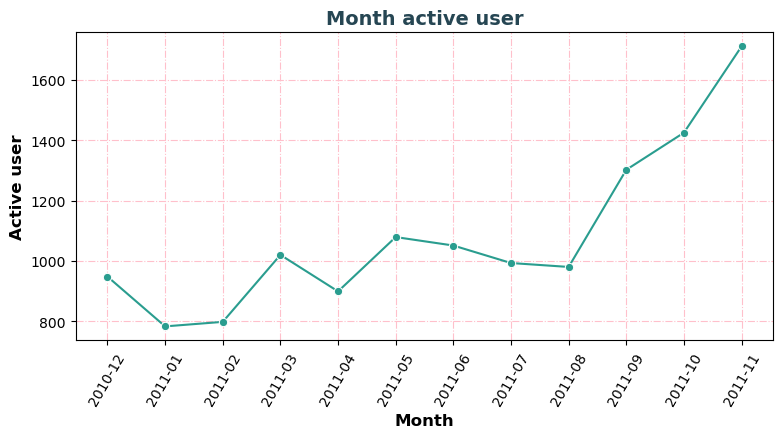

In [18]:
plt.figure(figsize=(9,4))
sns.lineplot(
    data=df_MAU,
    x='invoice_year_month',
    y='cust_id',
    color='#2a9d8f',
    marker='o'
)
plt.title('Month active user', color='#264653', fontsize=14, weight='bold')
plt.grid(True, ls='-.', color='pink')
plt.xticks(rotation=60)
plt.xlabel('Month', fontsize=12, weight='bold')
plt.ylabel('Active user', fontsize=12, weight='bold')
plt.show()

In [19]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,invoice_month,invoice_day,invoice_hour,invoice_year_month,invoice_week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2010-12,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed


2. How are the number of orders and total order amount each month?

In [20]:
df_orderbymonth = df.groupby('invoice_year_month').agg({'invoice_num':'nunique', 'quantity':'sum'}).reset_index()
df_orderbymonth['quantity'] = df_orderbymonth['quantity']/1e3
df_orderbymonth

,invoice_year_month,invoice_num,quantity
0,2010-12,1708,328.198
1,2011-01,1236,428.915
2,2011-02,1202,268.443
3,2011-03,1619,353.076
4,2011-04,1384,305.865
5,2011-05,1849,379.518
6,2011-06,1707,370.476
7,2011-07,1593,375.446
8,2011-08,1544,411.264
9,2011-09,2078,552.302


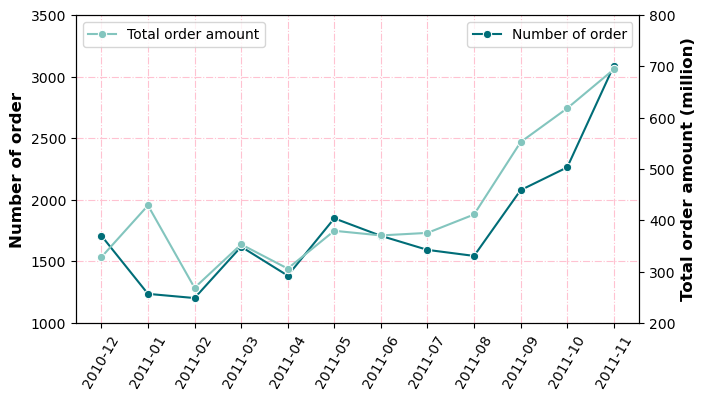

In [21]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.lineplot(
    data=df_orderbymonth,
    x='invoice_year_month',
    y='invoice_num',
    marker='o',
    color='#006d77',
    label='Number of order'
)
plt.xlabel('')
plt.ylabel('Number of order', fontsize=12, weight='bold')
plt.grid(True, ls='-.', color='#ffc2d1')
plt.ylim(1000,3500)
plt.xticks(rotation=60)

plt.twinx()

sns.lineplot(
    data=df_orderbymonth,
    x='invoice_year_month',
    y='quantity',
    marker='o',
    color='#83c5be',
    label='Total order amount'
)
plt.ylabel('Total order amount (million)', fontsize=12, weight='bold')
plt.legend(loc=2)
plt.ylim(200,800)

plt.show()

3. Analyze the number of customers by weekdays and by hours

In [18]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,invoice_month,invoice_day,invoice_hour,invoice_year_month,invoice_week_days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2010-12,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed


In [19]:
df_qty_cust = pd.pivot_table(
    data=df,
    index='invoice_week_days',
    columns='invoice_hour',
    values='cust_id',
    aggfunc='nunique'
)
df_qty_cust

invoice_hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
invoice_week_days,,,,,,,,,,,,,,,
Fri,NaN,8.0,112.0,250.0,350.0,307.0,379.0,347.0,297.0,252.0,127.0,84.0,3.0,1.0,1.0
Mon,NaN,4.0,78.0,225.0,286.0,315.0,407.0,402.0,338.0,293.0,195.0,103.0,10.0,NaN,NaN
Sun,NaN,NaN,NaN,5.0,170.0,300.0,350.0,290.0,252.0,259.0,89.0,NaN,NaN,NaN,NaN
Thu,21.0,9.0,90.0,263.0,397.0,347.0,459.0,412.0,400.0,373.0,288.0,266.0,188.0,151.0,22.0
Tue,NaN,5.0,107.0,266.0,355.0,375.0,444.0,402.0,331.0,334.0,185.0,130.0,3.0,NaN,NaN
Wed,NaN,4.0,98.0,286.0,363.0,351.0,467.0,414.0,362.0,353.0,256.0,98.0,NaN,1.0,1.0


In [20]:
df_qty_cust=df_qty_cust.loc[['Mon','Tue','Wed','Thu','Fri','Sun']]
df_qty_cust

invoice_hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
invoice_week_days,,,,,,,,,,,,,,,
Mon,NaN,4.0,78.0,225.0,286.0,315.0,407.0,402.0,338.0,293.0,195.0,103.0,10.0,NaN,NaN
Tue,NaN,5.0,107.0,266.0,355.0,375.0,444.0,402.0,331.0,334.0,185.0,130.0,3.0,NaN,NaN
Wed,NaN,4.0,98.0,286.0,363.0,351.0,467.0,414.0,362.0,353.0,256.0,98.0,NaN,1.0,1.0
Thu,21.0,9.0,90.0,263.0,397.0,347.0,459.0,412.0,400.0,373.0,288.0,266.0,188.0,151.0,22.0
Fri,NaN,8.0,112.0,250.0,350.0,307.0,379.0,347.0,297.0,252.0,127.0,84.0,3.0,1.0,1.0
Sun,NaN,NaN,NaN,5.0,170.0,300.0,350.0,290.0,252.0,259.0,89.0,NaN,NaN,NaN,NaN


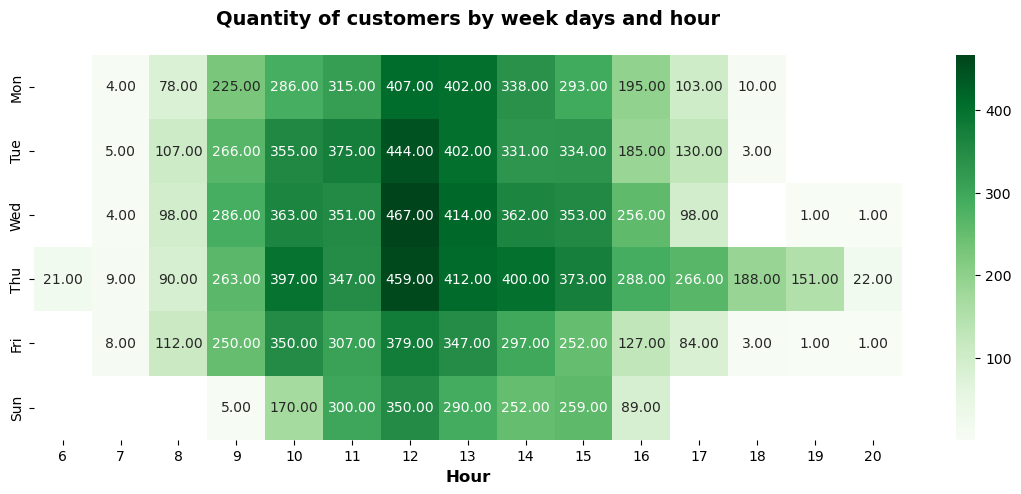

In [23]:
plt.figure(figsize=(14,5))
sns.heatmap(df_qty_cust,annot=True,cmap='Greens',fmt='.2f')
plt.ylabel('')
plt.xlabel('Hour',fontsize=12,weight='bold')
plt.title('Quantity of customers by week days and hour\n',fontsize=14,weight='bold')
plt.show()

4. Top 10 Contries bring most sales for the company?

In [22]:
df_salesbycountry = df.groupby('country')['amount'].sum().reset_index()
df_salesbycountry = df_salesbycountry.sort_values(by='amount',ascending=False).reset_index()
df_salesbycountry

,index,country,amount
0,35,United Kingdom,7202061.844
1,23,Netherlands,274503.120
2,10,EIRE,273825.110
3,14,Germany,227872.430
4,13,France,213830.250
5,0,Australia,139965.350
6,30,Spain,68018.650
7,32,Switzerland,57148.500
8,3,Belgium,40055.690
9,31,Sweden,39684.750


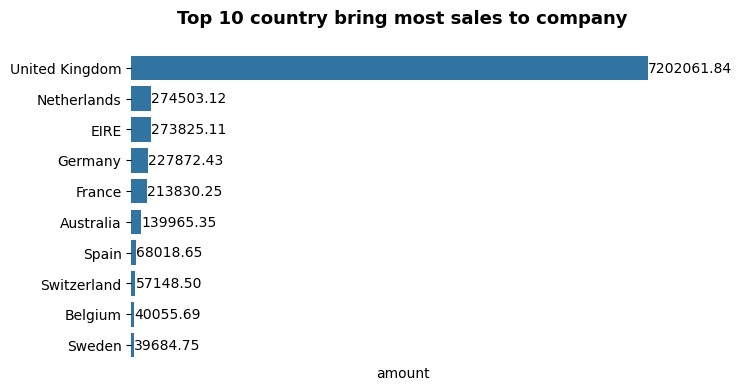

In [23]:
plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=df_salesbycountry.loc[0:9],
    x='amount',
    y='country'
)

plt.bar_label(ax.containers[0], fmt='%.2f')
ax.set_frame_on(False)
plt.ylabel('')
plt.xticks([])
plt.title('Top 10 country bring most sales to company\n', fontsize=13, weight='bold')

plt.show()

5. Countries with most AOV - Average Order Value:

In [24]:
df_AOV = df.groupby('country').agg({'invoice_num':'nunique', 'amount':'sum'}).reset_index()
df_AOV['average_order_value'] = df_AOV['amount']/df_AOV['invoice_num']
df_AOV = df_AOV.sort_values(by='average_order_value', ascending=False).reset_index()
df_AOV

,index,country,invoice_num,amount,average_order_value
0,29,Singapore,10,33438.190,3343.819000
1,23,Netherlands,98,274503.120,2801.052245
2,0,Australia,69,139965.350,2028.483333
3,20,Lebanon,1,1693.880,1693.880000
4,19,Japan,27,39375.190,1458.340370
5,17,Israel,6,7449.130,1241.521667
6,4,Brazil,1,1143.600,1143.600000
7,33,USA,4,4274.660,1068.665000
8,27,RSA,1,1002.310,1002.310000
9,9,Denmark,20,18973.640,948.682000


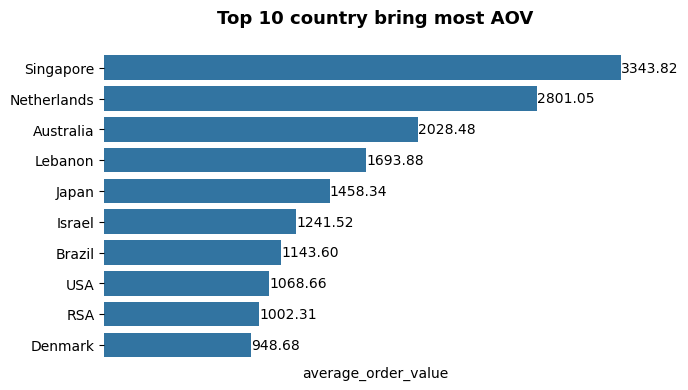

In [25]:
plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=df_AOV.loc[0:9],
    x='average_order_value',
    y='country'
)

plt.bar_label(ax.containers[0], fmt='%.2f')
ax.set_frame_on(False)
plt.ylabel('')
plt.xticks([])
plt.title('Top 10 country bring most AOV\n', fontsize=13, weight='bold')

plt.show()

6. How many new and old customers do you have each month?

In [26]:
df_trans_time = df.groupby('cust_id')['invoice_date'].min().reset_index()
df_trans_time = df_trans_time.rename(columns={'invoice_date':'first_trans_time'})
df_trans_time.head()

,cust_id,first_trans_time
0,12346,2011-01-18 10:01:00
1,12347,2010-12-07 14:57:00
2,12348,2010-12-16 19:09:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00


In [27]:
df = pd.merge(
    left = df,
    right = df_trans_time,
    on = 'cust_id',
    how = 'left'
)

df.loc[df['invoice_date'] == df['first_trans_time'], 'customer_type'] = 'new'
df.loc[df['invoice_date'] != df['first_trans_time'], 'customer_type'] = 'old'
df.sample(5)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,invoice_month,invoice_day,invoice_hour,invoice_year_month,invoice_week_days,first_trans_time,customer_type
290751,570672,23247,BISCUIT TIN 50'S CHRISTMAS,6,2011-10-11 14:52:00,2.89,12536,France,17.34,10,11,14,2011-10,Tue,2011-10-11 14:52:00,new
163579,556917,20837,FRENCH FLORAL CUSHION COVER,12,2011-06-15 13:37:00,0.83,12415,Australia,9.96,6,15,13,2011-06,Wed,2011-01-06 11:12:00,old
149469,555240,84212,"ASSORTED FLOWER COLOUR ""LEIS""",48,2011-06-01 13:07:00,0.65,15039,United Kingdom,31.20,6,1,13,2011-06,Wed,2010-12-06 11:26:00,old
196832,561006,23203,JUMBO BAG DOILEY PATTERNS,10,2011-07-22 15:02:00,2.08,16161,United Kingdom,20.80,7,22,15,2011-07,Fri,2010-12-06 09:40:00,old
104938,549569,84457,SET/3 RABBITS FLOWER SKIPPPING ROPE,2,2011-04-10 15:15:00,0.85,15547,United Kingdom,1.70,4,10,15,2011-04,Sun,2010-12-12 13:26:00,old


In [28]:
df_cust_bymonth = df.groupby(['invoice_year_month','customer_type'])['cust_id'].nunique().reset_index()
df_cust_bymonth

,invoice_year_month,customer_type,cust_id
0,2010-12,new,948
1,2010-12,old,356
2,2011-01,new,421
3,2011-01,old,464
4,2011-02,new,380
5,2011-02,old,494
6,2011-03,new,440
7,2011-03,old,666
8,2011-04,new,299
9,2011-04,old,666


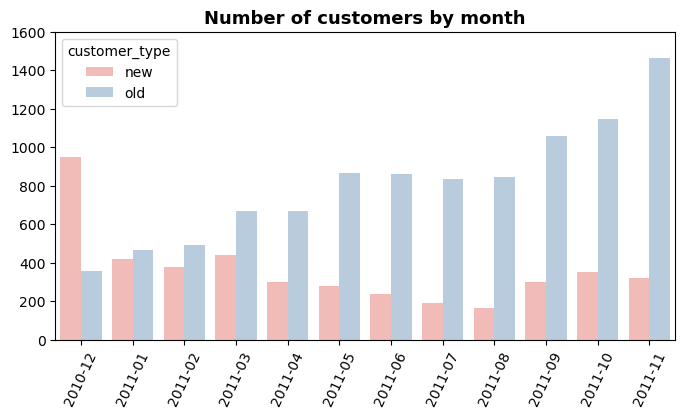

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(
    data=df_cust_bymonth,
    x='invoice_year_month',
    y='cust_id',
    hue='customer_type',
    palette='Pastel1'
)

plt.xlabel('')
plt.xticks(rotation=65)
plt.title('Number of customers by month', fontsize=13, weight='bold')
plt.ylabel('')
plt.ylim(0,1600)

plt.show()

7. Considering the new customers of December 2010, what is the average transaction value of these customers in each month when they return?

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389168 entries, 0 to 389167
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   invoice_num         389168 non-null  object        
 1   stock_code          389168 non-null  object        
 2   description         389168 non-null  object        
 3   quantity            389168 non-null  int64         
 4   invoice_date        389168 non-null  datetime64[ns]
 5   unit_price          389168 non-null  float64       
 6   cust_id             389168 non-null  int32         
 7   country             389168 non-null  object        
 8   amount              389168 non-null  float64       
 9   invoice_month       389168 non-null  int32         
 10  invoice_day         389168 non-null  int32         
 11  invoice_hour        389168 non-null  int32         
 12  invoice_year_month  389168 non-null  object        
 13  invoice_week_days   389168 no

In [37]:
df_avg_transvalue = df[(df['first_trans_time'] > '30-11-2010') & (df['first_trans_time'] < '1-1-2011')].groupby('invoice_year_month')['amount'].mean().reset_index()
df_avg_transvalue

,invoice_year_month,amount
0,2010-12,22.004609
1,2011-01,26.621583
2,2011-02,26.663014
3,2011-03,26.658432
4,2011-04,21.118962
5,2011-05,28.829014
6,2011-06,27.744332
7,2011-07,27.403010
8,2011-08,30.206015
9,2011-09,33.033971


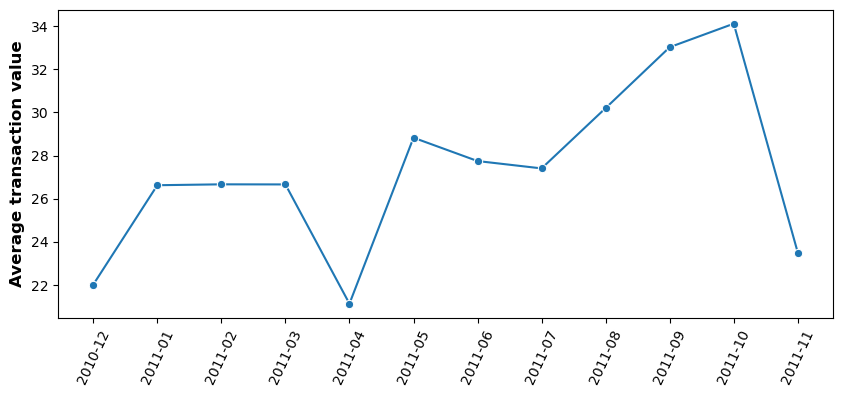

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(
    data=df_avg_transvalue,
    x='invoice_year_month',
    y='amount',
    marker='o'
)
plt.xlabel('')
plt.ylabel('Average transaction value', fontsize=12, weight='bold')
plt.xticks(rotation=65)
plt.show()

In [42]:
df.head(2)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,invoice_month,invoice_day,invoice_hour,invoice_year_month,invoice_week_days,first_trans_time,customer_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2010-12,Wed,2010-12-01 08:26:00,new
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed,2010-12-01 08:26:00,new


8. `**Customer Segmentation:

In [59]:
#Tính frequency trong 3 tháng & ngày giao dịch cuối cùng của mỗi khách hàng:
df1 = df.groupby('cust_id').agg({'invoice_date':'max','invoice_num':'nunique'}).reset_index()
df1['recency']=(df['invoice_date'].max() - df1['invoice_date']).dt.days
df1=df1.rename(columns={'invoice_date':'last_trans_date', 'invoice_num':'frequency'})
df1

,cust_id,last_trans_date,frequency,recency
0,12346,2011-01-18 10:17:00,2,316
1,12347,2011-10-31 12:25:00,6,30
2,12348,2011-09-25 13:13:00,4,66
3,12349,2011-11-21 09:51:00,1,9
4,12350,2011-02-02 16:01:00,1,301
...,...,...,...,...
4326,18280,2011-03-07 09:52:00,1,268
4327,18281,2011-06-12 10:53:00,1,171
4328,18282,2011-08-09 15:10:00,2,113
4329,18283,2011-11-30 12:59:00,15,0


Recency:
         + 1đ: >48
         + 2đ: 15-48
         + 3đ: <15

      + Frequency:
         + 1đ: 1 
         + 2đ: 2-5
         + 3đ: >5 

In [64]:
#Chấm điểm khách hàng: 
df1.loc[df1['recency'] > 48, 'recency_score'] = 1
df1.loc[(df1['recency'] <= 48) & (df1['recency'] >=15), 'recency_score'] = 2
df1.loc[df1['recency'] < 15, 'recency_score'] = 3

df1.loc[df1['frequency'] == 1, 'frequency_score'] = 1
df1.loc[(df1['frequency'] <= 5) & (df1['frequency'] >=2), 'frequency_score'] = 2
df1.loc[df1['frequency'] > 5, 'frequency_score'] = 3

df1.head()

,cust_id,last_trans_date,frequency,recency,recency_score,frequency_score
0,12346,2011-01-18 10:17:00,2,316,1.0,2.0
1,12347,2011-10-31 12:25:00,6,30,2.0,3.0
2,12348,2011-09-25 13:13:00,4,66,1.0,2.0
3,12349,2011-11-21 09:51:00,1,9,3.0,1.0
4,12350,2011-02-02 16:01:00,1,301,1.0,1.0


In [69]:
#Phân loại khách hàng:
df1.loc[(df1['recency_score'] ==3) & (df1['frequency_score'] ==1),'customer_class'] = 'new customer'
df1.loc[(df1['recency_score'] ==3) & (df1['frequency_score'] ==2),'customer_class'] = 'potential loyal'
df1.loc[(df1['recency_score'] ==3) & (df1['frequency_score'] ==3),'customer_class'] = 'loyal'

df1.loc[(df1['recency_score'] <3) & (df1['frequency_score'] ==1),'customer_class'] = 'low value'
df1.loc[(df1['recency_score'] <3) & (df1['frequency_score'] ==2),'customer_class'] = 'losing potential loyal'
df1.loc[(df1['recency_score'] ==1) & (df1['frequency_score'] ==3),'customer_class'] = 'lost loyal'
df1.loc[(df1['recency_score'] ==2) & (df1['frequency_score'] ==3),'customer_class'] = 'losing loyal'

df = pd.merge(
    left = df,
    right = df1[['cust_id','customer_class']],
    on = 'cust_id',
    how = 'left'
)
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,invoice_month,invoice_day,invoice_hour,invoice_year_month,invoice_week_days,first_trans_time,customer_type,customer_class
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,1,8,2010-12,Wed,2010-12-01 08:26:00,new,lost loyal
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed,2010-12-01 08:26:00,new,lost loyal
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,1,8,2010-12,Wed,2010-12-01 08:26:00,new,lost loyal
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed,2010-12-01 08:26:00,new,lost loyal
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,1,8,2010-12,Wed,2010-12-01 08:26:00,new,lost loyal


In [70]:
#Tỷ trọng khách hàng và doanh thu khách hàng mang lại theo từng hạng:
df_cust_class = df.groupby('customer_class').agg({'cust_id':'nunique', 'amount':'sum'}).reset_index()
df_cust_class

,customer_class,cust_id,amount
0,losing loyal,331,1633904.750
1,losing potential loyal,1506,1711735.103
2,lost loyal,180,432793.240
3,low value,1241,435235.781
4,loyal,524,4101433.370
5,new customer,115,34022.270
6,potential loyal,434,479746.280


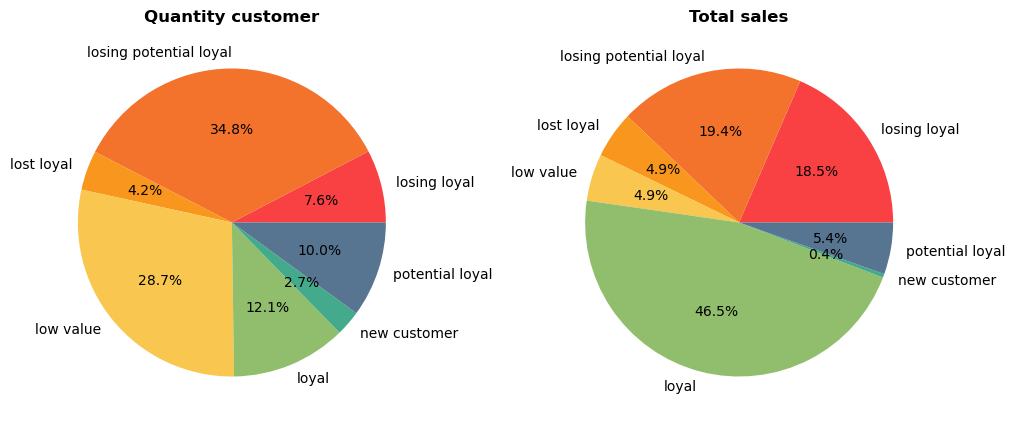

In [74]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.pie(
    x = df_cust_class['cust_id'], 
    labels = df_cust_class['customer_class'], 
    autopct='%1.1f%%',
    colors=['#f94144','#f3722c','#f8961e','#f9c74f','#90be6d','#43aa8b','#577590']
    )
plt.title('Quantity customer', fontsize=12, weight='bold')

plt.subplot(1,2,2)
plt.pie(
    x = df_cust_class['amount'], 
    labels = df_cust_class['customer_class'], 
    autopct='%1.1f%%',
    colors=['#f94144','#f3722c','#f8961e','#f9c74f','#90be6d','#43aa8b','#577590']
    )
plt.title('Total sales', fontsize=12, weight='bold')

plt.show()